In [1]:
library(rGADEM)
library(BSgenome.Hsapiens.UCSC.hg38)
library(GenomicRanges)
library(rtracklayer)
library(Biostrings)

Loading required package: Biostrings

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: XVector

Loading req

In [14]:
# list.files()

In [3]:
down = import("extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.downregulated.padj0.1_log2FC.minus.0.5.bed", format='BED')
up = import("extended20merged20.the.matrix.peaks_and_counts.combined_peak_DESeq2_results.SVA.upregulated.padj0.1_log2FC.plus.0.5.bed", format="BED")

length(down)
length(up)

# Print initial statistics
cat("Initial peak counts:\n")
cat("Downregulated peaks:", length(down), "\n")
cat("Upregulated peaks:", length(up), "\n")

# Remove regions that are outside valid chromosome ranges
valid_chromosomes <- paste0("chr", c(1:22, "X", "Y", "M"))

# Extract sequences with bedtools
# bedtools getfasta -fi genome.fa -bed fixed_peaks.bed -fo peaks.fa

[1] 8636

[1] 10146

Initial peak counts:
Downregulated peaks: 8636 
Upregulated peaks: 10146 


In [4]:
# Get sequences directly
down_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, down)
up_seq <- getSeq(BSgenome.Hsapiens.UCSC.hg38, up)

# Run GADEM
gadem_down <- GADEM(down_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)
gadem_up <- GADEM(up_seq, verbose=1, genome=BSgenome.Hsapiens.UCSC.hg38)

*** Start C Programm ***
input sequence file:  
number of sequences and average length:				8636  69.7
Use pgf method to approximate llr null distribution
parameters estimated from sequences in:  

number of GA generations & population size:			5 100

PWM score p-value cutoff for binding site declaration:		2.000000e-04
ln(E-value) cutoff for motif declaration:			0.000000

number of EM steps:						40
minimal no. sites considered for a motif:			431

[a,c,g,t] frequencies in input data:				0.221443 0.278557 0.278557 0.221443
*** Running an unseeded analysis ***
GADEM cycle  1: enumerate and count k-mers... top 3  4, 5-mers: 20 40 60
Done.
Initializing GA... Done.
GADEM cycle[  1] generation[  1] number of unique motif: 4
   spacedDyad: tttttnnnnnnnntttc    motifConsensus: yCCyCyyCCTCyTCCTC     0.20 fitness: -1028.15
   spacedDyad: gaggnnagag           motifConsensus: GrrGvAGrrG            0.80 fitness: -441.30
   spacedDyad: gaggtca              motifConsensus: GAGGAGG               0.40 fi

In [5]:
# str(gadem_down)
# str(gadem_up)

In [6]:
nOccurrences(gadem_down)
consensus(gadem_down)
cat("consensus")
consensus(gadem_down)[1]
consensus(gadem_down)[2]
consensus(gadem_down)[3]
consensus(gadem_down)[4]
consensus(gadem_down)[5]

[1] 1917  933  610 1004  467

[1] "rGrAGrrGrrGrrGrAGn" "sGGmGGCkGmGGmkGsrG" "nsCTGGAGn"         
[4] "nTTTyyTTTTy"        "nACCwCCAn"

consensus

[1] "rGrAGrrGrrGrrGrAGn"

[1] "sGGmGGCkGmGGmkGsrG"

[1] "nsCTGGAGn"

[1] "nTTTyyTTTTy"

[1] "nACCwCCAn"

In [7]:
nOccurrences(gadem_up)
consensus(gadem_up)
cat("consensus")
consensus(gadem_up)[1]
consensus(gadem_up)[2]
consensus(gadem_up)[3]
consensus(gadem_up)[4]
consensus(gadem_up)[5]

[1] 2021 1142 1109

[1] "nGrGrvrGAGrvrGrrrrrn" "nTTkTwTyTTTn"         "kGskGswGGrG"

consensus

[1] "nGrGrvrGAGrvrGrrrrrn"

[1] "nTTkTwTyTTTn"

[1] "kGskGswGGrG"

[1] NA

[1] NA

In [8]:
gadem_down
gadem_up

	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


	Object of class 'gadem' 
	This object has the following slots: 
	motifs,pwm,consensus,align,name,seq,chr,start,end,strand,seqID,pos,pval,fastaHeader


In [9]:
# Assuming your gadem object is called gadem_down
length(gadem_down@motifList)  # number of motifs
# str(gadem_down@motifList)
# Assuming your gadem object is called gadem_up
length(gadem_up@motifList)  # number of motifs
# str(gadem_up@motifList)

[1] 5

[1] 3

In [10]:
print("Motif Visualization")

[1] "Motif Visualization"


In [11]:
library("seqLogo")

cat("PWM in down-binding sites")
pwm_list_down <- lapply(gadem_down@motifList, function(m) m@pwm)
names(pwm_list_down) <- paste0("motif_", seq_along(pwm_list_down))
pwm_list_down

cat("PWM in up-binding sites")
pwm_list_up <- lapply(gadem_up@motifList, function(m) m@pwm)
names(pwm_list_up) <- paste0("motif_", seq_along(pwm_list_up))
pwm_list_up

PWM in down-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.3899 0.1103 0.3873 0.6513 0.1666 0.4029 0.5633 0.2577 0.3800 0.5638 0.2467
C 0.0151 0.0500 0.1364 0.0057 0.0120 0.0973 0.0489 0.0109 0.0416 0.0838 0.0604
G 0.4034 0.8382 0.4743 0.2780 0.8069 0.4987 0.2514 0.7226 0.5711 0.2509 0.6893
T 0.1916 0.0015 0.0021 0.0651 0.0146 0.0010 0.1364 0.0088 0.0073 0.1015 0.0036
      12     13     14     15     16     17     18
A 0.3930 0.5560 0.1848 0.3363 0.6164 0.1145 0.2853
C 0.1379 0.0047 0.0229 0.1015 0.0333 0.0749 0.2419
G 0.4680 0.3316 0.7830 0.5612 0.2520 0.8074 0.3086
T 0.0010 0.1077 0.0093 0.0010 0.0984 0.0031 0.1643

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1880 0.1046 0.0123 0.5038 0.1684 0.0058 0.1556 0.0625 0.0379 0.3578 0.0625
C 0.2570 0.0874 0.0337 0.3367 0.0401 0.0411 0.6337 0.2102 0.1289 0.3824 0.0294
G 0.4478 0.7731 0.9535 0.1076 0.7803 0.9493 0.1406 0.4893 0.8327 0.1385 0.8819
T 0.1072 0.0348 0.0005 0.0519 0.0112 0.0037 0.0700 0.2380 0.0005 0.1214 0.0262
      12     13     14     15     16     17     18
A 0.0283 0.1652 0.1140 0.0851 0.1207 0.3224 0.0803
C 0.1032 0.5664 0.0990 0.0926 0.3267 0.0942 0.0836
G 0.8552 0.1128 0.5584 0.8090 0.4995 0.5259 0.8270
T 0.0133 0.1556 0.2286 0.0133 0.0531 0.0576 0.0091

$motif_3
       1      2      3      4      5      6      7      8      9
A 0.2563 0.0005 0.0005 0.0005 0.0005 0.0005 0.9985 0.0005 0.2280
C 0.1587 0.4586 0.9985 0.0005 0.0005 0.0005 0.0005 0.0005 0.2164
G 0.3203 0.5404 0.0005 0.0005 0.9985 0.9985 0.0005 0.9985 0.3492
T 0.2647 0.0005 0.0005 0.9985 0.0005 0.0005 0.0005 0.0005 0.2064

$motif_4
       1      2      3      4      5      6      7      8      9     10     11
A 0.2790 0.0085 0.0015 0.0094 0.0562 0.1894 0.0174 0.0880 0.0045 0.0025 0.0974
C 0.2989 0.0075 0.0343 0.0273 0.2430 0.2739 0.3047 0.1914 0.0512 0.1180 0.3272
G 0.2005 0.0005 0.0045 0.0005 0.1446 0.0979 0.0224 0.0085 0.0055 0.0911 0.0704
T 0.2215 0.9836 0.9597 0.9627 0.5562 0.4389 0.6556 0.7122 0.9389 0.7883 0.5050

$motif_5
       1      2      3      4      5      6      7      8      9
A 0.1944 0.9985 0.0005 0.0005 0.6395 0.0005 0.0005 0.9985 0.1661
C 0.3361 0.0005 0.9985 0.9985 0.0005 0.9985 0.9985 0.0005 0.3048
G 0.3012 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.3362
T 0.1683 0.0005 0.0005 0.0005 0.3595 0.0005 0.0005 0.0005 0.1929

PWM in up-binding sites

$motif_1
       1      2      3      4      5      6      7      8      9     10     11
A 0.3296 0.1738 0.6331 0.1012 0.4227 0.3146 0.4504 0.0405 0.7709 0.0637 0.3531
C 0.1615 0.0173 0.0010 0.1244 0.0568 0.3669 0.1195 0.0830 0.0064 0.0158 0.0385
G 0.3377 0.8074 0.3605 0.7738 0.5170 0.3037 0.2810 0.8755 0.1793 0.9185 0.6074
T 0.1711 0.0015 0.0054 0.0005 0.0035 0.0148 0.1491 0.0010 0.0435 0.0020 0.0010
      12     13     14     15     16     17     18     19     20
A 0.3536 0.5210 0.1067 0.4993 0.1748 0.3877 0.3210 0.5304 0.1814
C 0.2899 0.2040 0.0958 0.0435 0.1590 0.0277 0.0425 0.0741 0.1602
G 0.3299 0.2331 0.7970 0.3738 0.5916 0.5837 0.6272 0.3911 0.4891
T 0.0267 0.0420 0.0005 0.0835 0.0746 0.0010 0.0094 0.0044 0.1693

$motif_2
       1      2      3      4      5      6      7      8      9     10     11
A 0.1983 0.0031 0.0031 0.0625 0.0075 0.3055 0.0835 0.0040 0.0066 0.0022 0.0031
C 0.2739 0.3291 0.0031 0.1849 0.1814 0.0416 0.0975 0.3894 0.0084 0.2496 0.2845
G 0.2448 0.0031 0.0005 0.2478 0.0031 0.0993 0.1613 0.0189 0.0031 0.0014 0.0022
T 0.2830 0.6647 0.9933 0.5047 0.8080 0.5537 0.6577 0.5878 0.9819 0.7468 0.7101
      12
A 0.2099
C 0.3190
G 0.2036
T 0.2675

$motif_3
       1      2      3      4      5      6      7      8      9     10     11
A 0.2791 0.0005 0.0005 0.2876 0.0005 0.0005 0.2822 0.0005 0.0005 0.3983 0.0005
C 0.0005 0.0005 0.3425 0.0005 0.0005 0.4622 0.2633 0.0005 0.0005 0.0005 0.0005
G 0.4305 0.9985 0.6565 0.3236 0.9985 0.5368 0.0005 0.9985 0.9985 0.3848 0.9985
T 0.2899 0.0005 0.0005 0.3884 0.0005 0.0005 0.4541 0.0005 0.0005 0.2165 0.0005

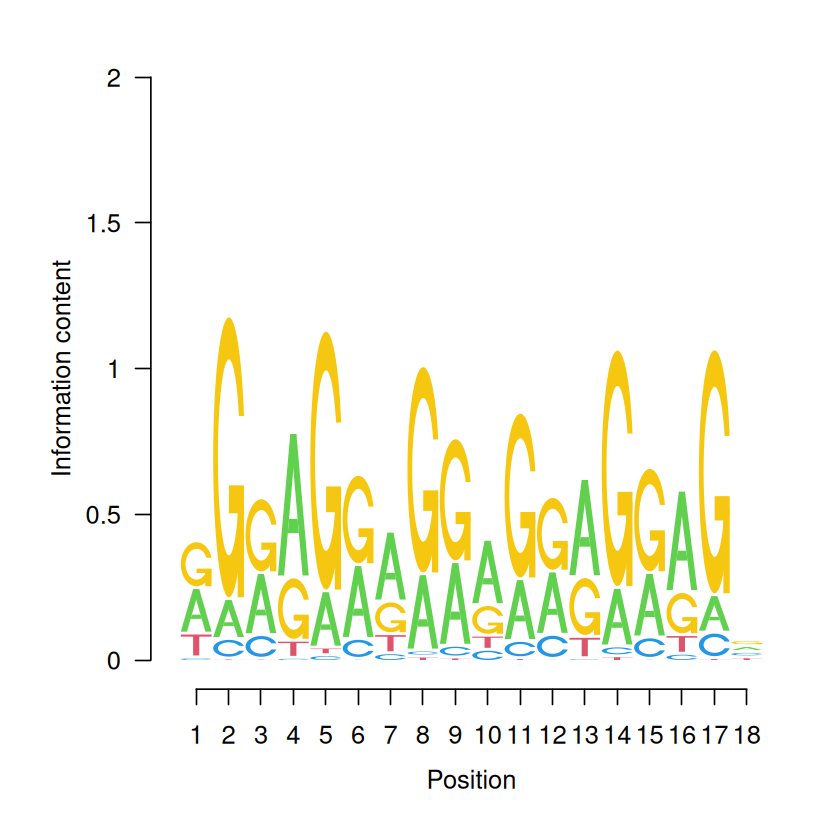

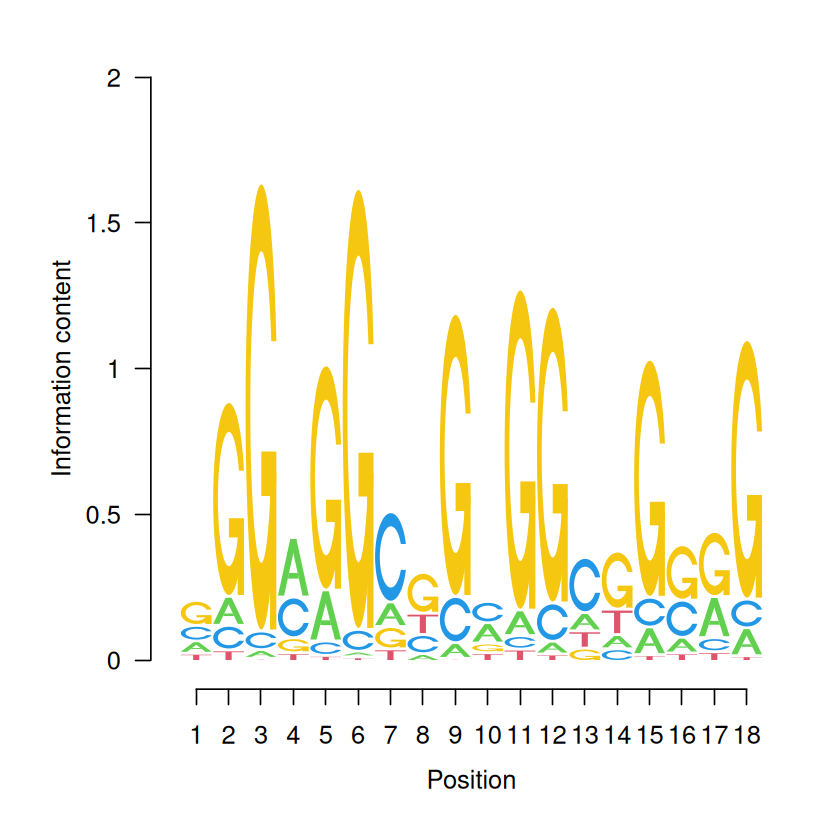

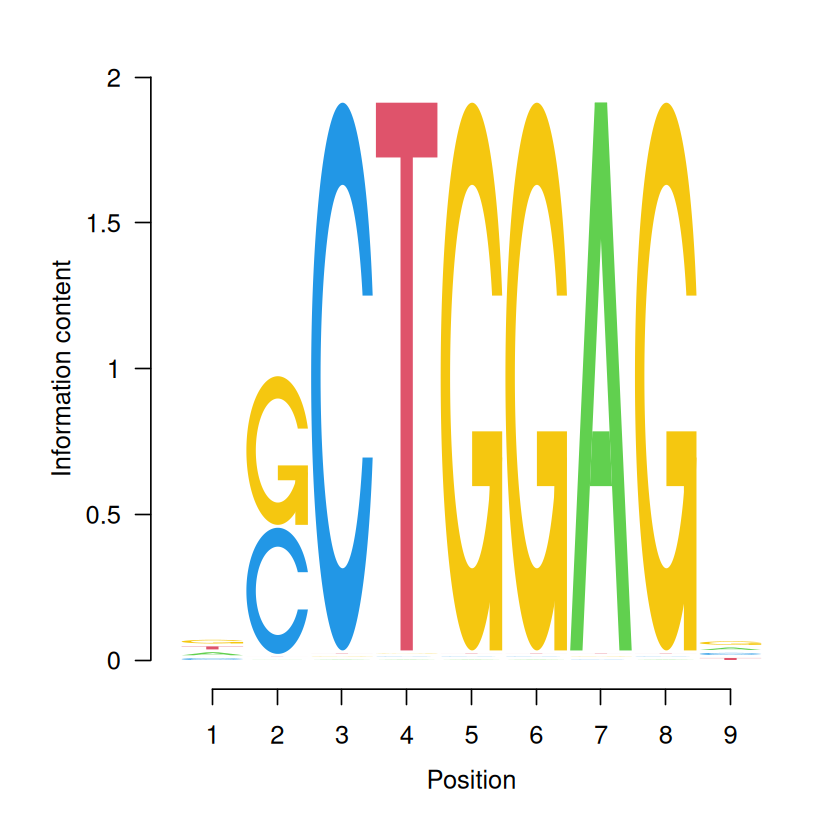

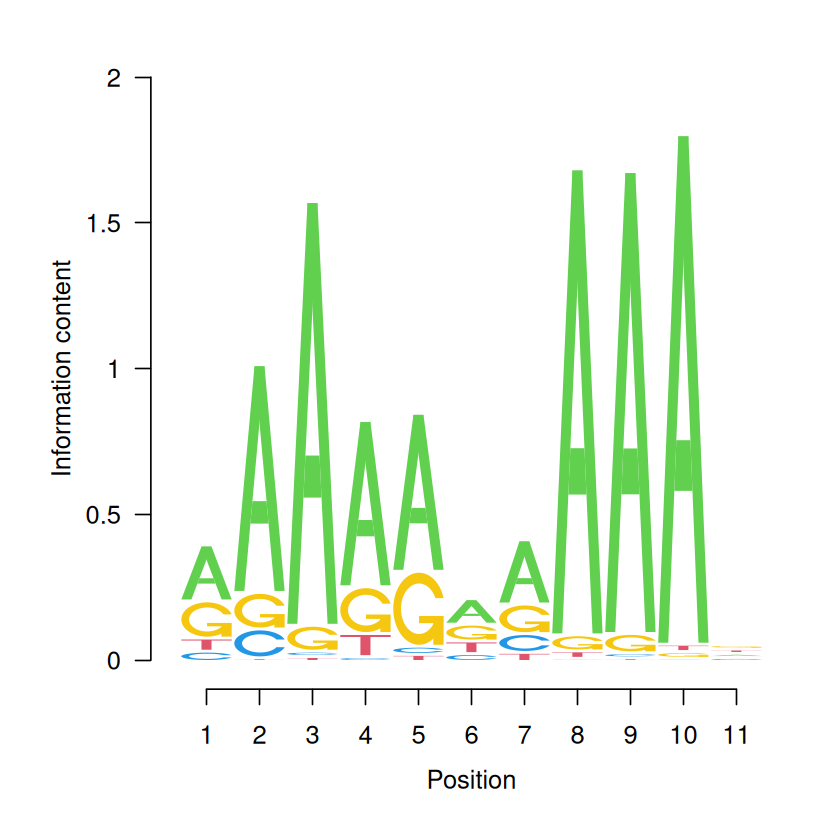

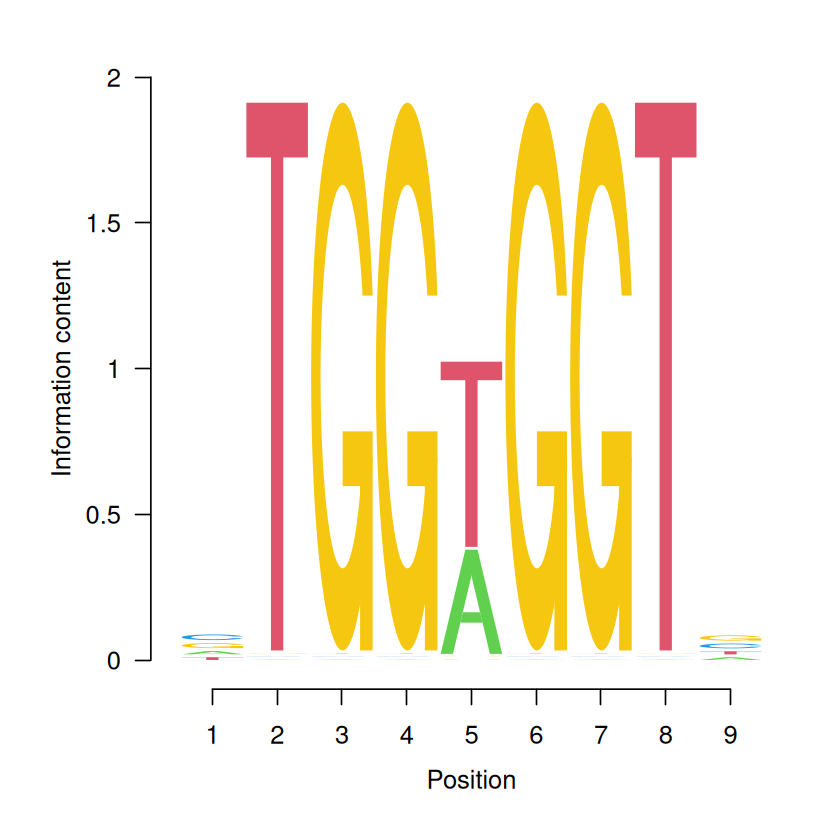

In [12]:
reverse_complement_pwm <- function(pwm) {
  # Reverse the columns (i.e., reverse the motif)
  pwm_rev <- pwm[, ncol(pwm):1]

  # Reorder the rows: A<->T, C<->G
  row_order <- match(c("T", "G", "C", "A"), rownames(pwm_rev))
  pwm_rc <- pwm_rev[row_order, ]
  rownames(pwm_rc) <- c("A", "C", "G", "T")  # restore row names

  return(pwm_rc)
}

seqLogo(pwm_list_down$motif_1)
seqLogo(pwm_list_down$motif_2)
seqLogo(pwm_list_down$motif_3)
seqLogo(reverse_complement_pwm(pwm_list_down$motif_4))
seqLogo(reverse_complement_pwm(pwm_list_down$motif_5))

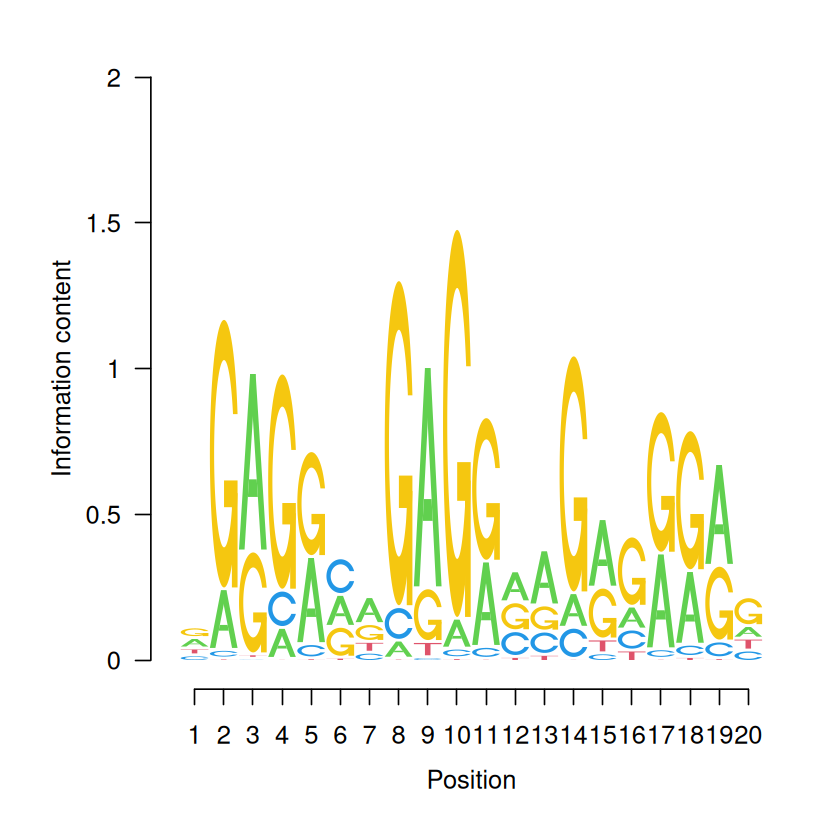

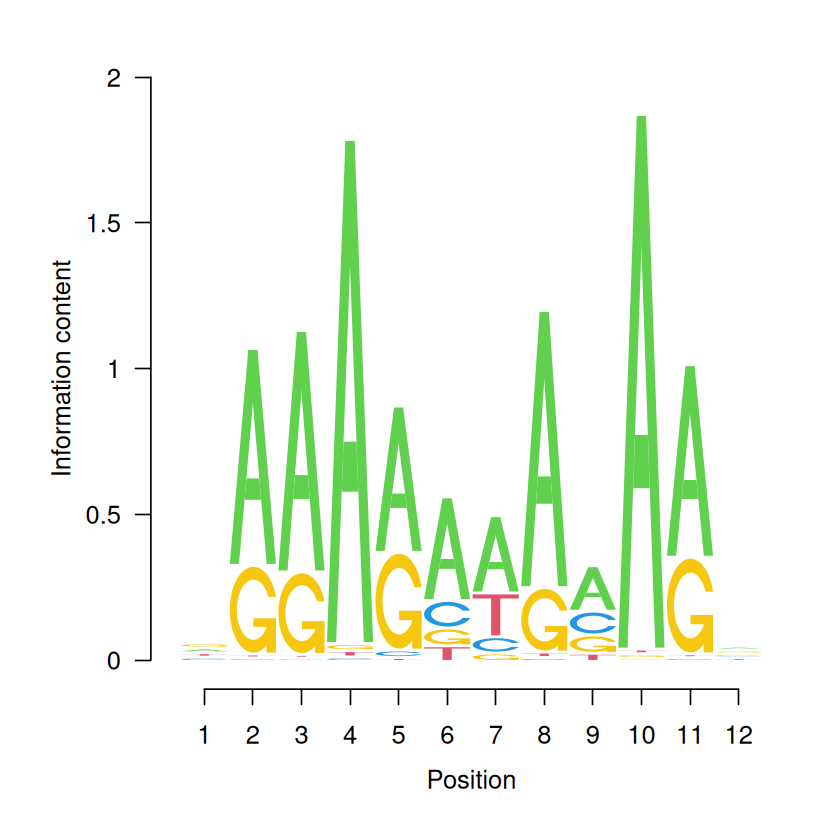

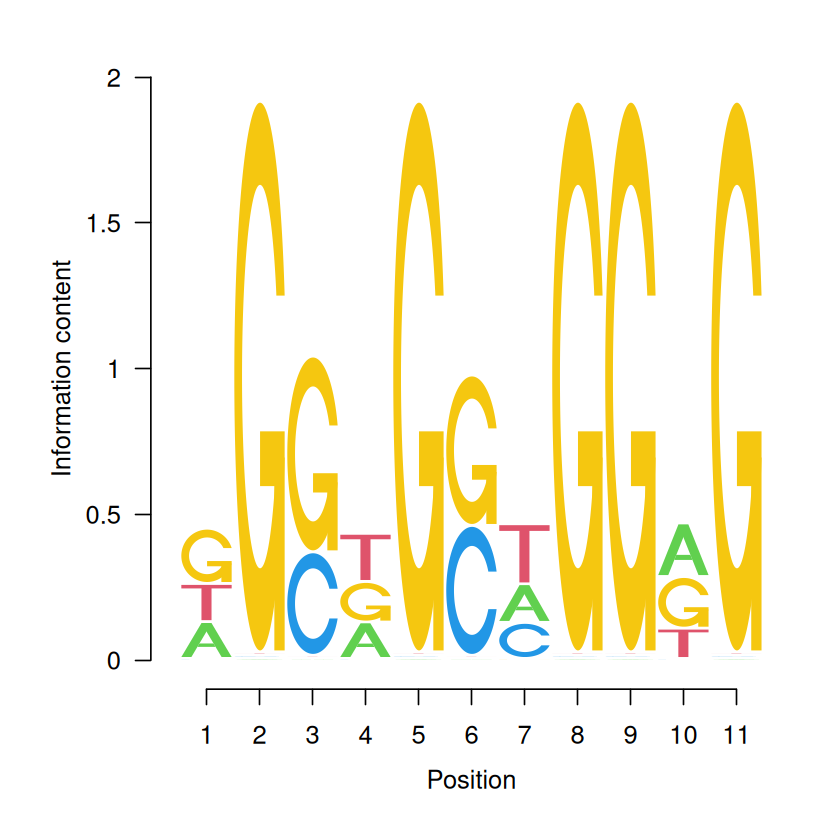

In [21]:
# seqLogo(reverse_complement_pwm(pwm_list_up$motif_1))
seqLogo(pwm_list_up$motif_1)
seqLogo(reverse_complement_pwm(pwm_list_up$motif_2))
# seqLogo(reverse_complement_pwm(pwm_list_up$motif_3))
seqLogo(pwm_list_up$motif_3)
# seqLogo(reverse_complement_pwm(pwm_list_up$motif_4))
# seqLogo(pwm_list_up$motif_5)

In [22]:
print("Similarity between motifs by using the statistics in universalmotif library")

[1] "Similarity between motifs by using the statistics in universalmotif library"


In [23]:
library(universalmotif)

# Function to properly convert PWM to universalmotif object
convert_to_universalmotif <- function(pwm_matrix, motif_name) {
    # Ensure the matrix has proper row names
    if(is.null(rownames(pwm_matrix))) {
        rownames(pwm_matrix) <- c("A", "C", "G", "T")
    }
    
    # Create universalmotif object
    create_motif(pwm_matrix, 
                 name = motif_name, 
                 type = "PWM",
                 alphabet = "DNA")
}

# Convert down-regulated motifs
motifs_down_um <- list()
for(motif_name in names(pwm_list_down)) {
    motifs_down_um[[motif_name]] <- convert_to_universalmotif(pwm_list_down[[motif_name]], 
                                                              paste0("Down_", motif_name))
}

# Convert up-regulated motifs  
motifs_up_um <- list()
for(motif_name in names(pwm_list_up)) {
    motifs_up_um[[motif_name]] <- convert_to_universalmotif(pwm_list_up[[motif_name]], 
                                                            paste0("Up_", motif_name))
}

print(paste("Created", length(motifs_down_um), "down-regulated motifs"))
print(paste("Created", length(motifs_up_um), "up-regulated motifs"))

Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name = "new motif", altname = NA_character_, :
“subscript out of bounds (index 0 >= vector size 0)”
Warning message in (function (motif, name

[1] "Created 5 down-regulated motifs"
[1] "Created 3 up-regulated motifs"


In [ ]:
# motifs_down_um
# motifs_up_um

In [24]:
# Combine all motifs for comparison
all_motifs_um <- c(motifs_down_um, motifs_up_um)

# Compare all motifs using different methods
comparison_pcc <- compare_motifs(all_motifs_um, method = "PCC")  # Pearson correlation
comparison_euclidean <- compare_motifs(all_motifs_um, method = "EUCL")  # Euclidean distance
comparison_kl <- compare_motifs(all_motifs_um, method = "KL")  # Kullback-Leibler

print("Pearson Correlation Comparison:")
print(round(comparison_pcc, 3))

[1] "Pearson Correlation Comparison:"
             Down_motif_1 Down_motif_2 Down_motif_3 Down_motif_4 Down_motif_5
Down_motif_1        1.000        0.702        0.691        0.585        0.492
Down_motif_2        0.702        1.000        0.687        0.179        0.480
Down_motif_3        0.691        0.687        1.000        0.045        0.845
Down_motif_4        0.585        0.179        0.045        1.000        0.050
Down_motif_5        0.492        0.480        0.845        0.050        1.000
Up_motif_1          0.819        0.621        0.434        0.541        0.380
Up_motif_2          0.607        0.150        0.137        0.889        0.130
Up_motif_3          0.677        0.539        0.786        0.103        0.811
             Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1      0.819      0.607      0.677
Down_motif_2      0.621      0.150      0.539
Down_motif_3      0.434      0.137      0.786
Down_motif_4      0.541      0.889      0.103
Down_motif_5      0.380      0

In [25]:
# Get indices for down and up motifs
num_down <- length(motifs_down_um)
num_up <- length(motifs_up_um)

# Extract cross-comparison (down vs up only)
down_vs_up_comparison <- comparison_pcc[1:num_down, (num_down + 1):(num_down + num_up)]

print("\nDown vs Up Motif Similarity Matrix:")
print(round(down_vs_up_comparison, 3))

# Set proper row and column names
rownames(down_vs_up_comparison) <- names(motifs_down_um)
colnames(down_vs_up_comparison) <- names(motifs_up_um)

[1] "\nDown vs Up Motif Similarity Matrix:"
             Up_motif_1 Up_motif_2 Up_motif_3
Down_motif_1      0.819      0.607      0.677
Down_motif_2      0.621      0.150      0.539
Down_motif_3      0.434      0.137      0.786
Down_motif_4      0.541      0.889      0.103
Down_motif_5      0.380      0.130      0.811


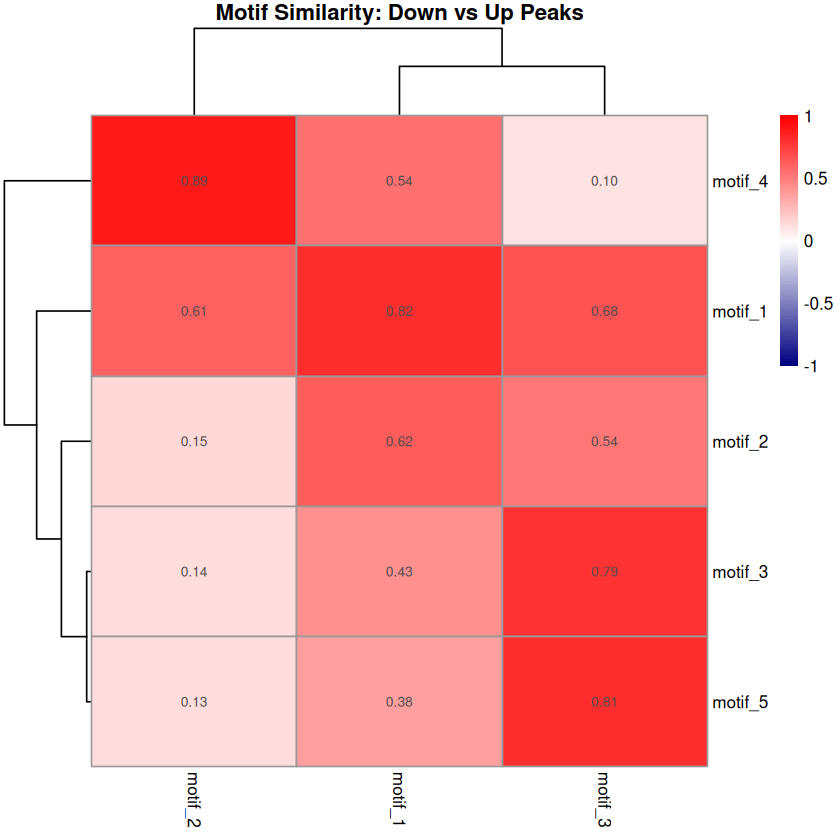

In [26]:
library(pheatmap)
library(RColorBrewer)

# Create heatmap
pheatmap(down_vs_up_comparison,
         main = "Motif Similarity: Down vs Up Peaks",
         color = colorRampPalette(c("navy", "white", "red"))(100),
         cluster_rows = TRUE,
         cluster_cols = TRUE,
         display_numbers = TRUE,
         number_format = "%.2f",
         fontsize_number = 8,
         breaks = seq(-1, 1, length.out = 101))

In [27]:
# Convert matrix to data frame for easier analysis
similarity_df <- expand.grid(Down_Motif = rownames(down_vs_up_comparison),
                            Up_Motif = colnames(down_vs_up_comparison),
                            stringsAsFactors = FALSE)

similarity_df$Similarity <- as.vector(down_vs_up_comparison)

# Sort by similarity
similarity_df <- similarity_df[order(similarity_df$Similarity, decreasing = TRUE), ]

print("Top 10 most similar motif pairs between conditions:")
print(head(similarity_df, 10))

print("\nTop 5 least similar motif pairs:")
print(tail(similarity_df, 5))

[1] "Top 10 most similar motif pairs between conditions:"
   Down_Motif Up_Motif Similarity
9     motif_4  motif_2  0.8892187
1     motif_1  motif_1  0.8189490
15    motif_5  motif_3  0.8114229
13    motif_3  motif_3  0.7861737
11    motif_1  motif_3  0.6772966
2     motif_2  motif_1  0.6205286
6     motif_1  motif_2  0.6070940
4     motif_4  motif_1  0.5411262
12    motif_2  motif_3  0.5388957
3     motif_3  motif_1  0.4336220
[1] "\nTop 5 least similar motif pairs:"
   Down_Motif Up_Motif Similarity
5     motif_5  motif_1  0.3796677
7     motif_2  motif_2  0.1503176
8     motif_3  motif_2  0.1373188
10    motif_5  motif_2  0.1304773
14    motif_4  motif_3  0.1030838


In [28]:
# Calculate summary statistics
summary_stats <- data.frame(
    Metric = c("Mean Similarity", "Max Similarity", "Min Similarity", 
               "Std Dev", "Pairs > 0.5", "Pairs > 0.7"),
    Value = c(
        round(mean(similarity_df$Similarity), 3),
        round(max(similarity_df$Similarity), 3),
        round(min(similarity_df$Similarity), 3),
        round(sd(similarity_df$Similarity), 3),
        sum(similarity_df$Similarity > 0.5),
        sum(similarity_df$Similarity > 0.7)
    )
)

print("Similarity Summary Statistics:")
print(summary_stats)

[1] "Similarity Summary Statistics:"
           Metric Value
1 Mean Similarity 0.508
2  Max Similarity 0.889
3  Min Similarity 0.103
4         Std Dev 0.275
5     Pairs > 0.5 9.000
6     Pairs > 0.7 4.000


In [29]:
print("Similarity between motifs by using the statistics in motifstack library")

[1] "Similarity between motifs by using the statistics in motifstack library"


In [30]:

# Pearson Correlation of two PWMs (allow alignment)
pwm_similarity <- function(pwm1, pwm2) {
  min_len <- min(ncol(pwm1), ncol(pwm2))
  pwm1_trim <- pwm1[, 1:min_len]
  pwm2_trim <- pwm2[, 1:min_len]

  # Flatten the matrices into vectors and correlate
  cor(as.vector(pwm1_trim), as.vector(pwm2_trim))
}

In [31]:
# Create an empty matrix to store pairwise similarities
similarity_matrix <- matrix(NA, 
                            nrow = length(pwm_list_up), 
                            ncol = length(pwm_list_down),
                            dimnames = list(names(pwm_list_up), names(pwm_list_down)))

# Fill in the matrix
for (i in names(pwm_list_up)) {
  for (j in names(pwm_list_down)) {
    pwm_up <- pwm_list_up[[i]]
    pwm_down <- reverse_complement_pwm(pwm_list_down[[j]])  # reverse-complement down motifs
    similarity_matrix[i, j] <- pwm_similarity(pwm_up, pwm_down)
  }
}

# View matrix
print(round(similarity_matrix, 3))


        motif_1 motif_2 motif_3 motif_4 motif_5
motif_1  -0.554  -0.279  -0.155   0.226   0.022
motif_2   0.491  -0.029   0.170  -0.427   0.127
motif_3  -0.414  -0.202  -0.330  -0.118  -0.038


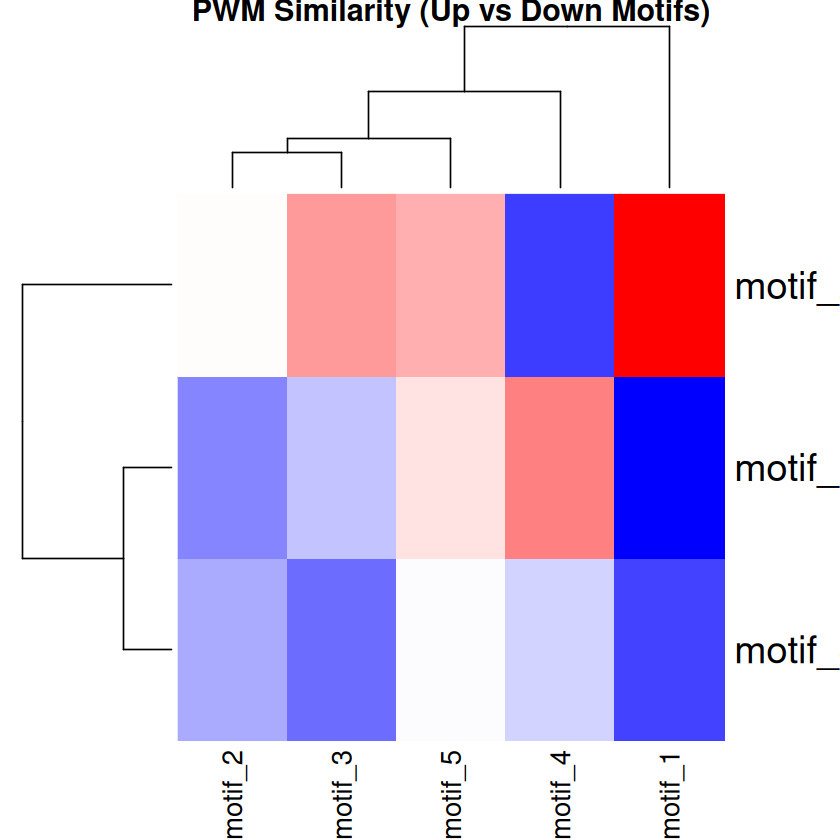

In [32]:
heatmap(similarity_matrix, 
        main = "PWM Similarity (Up vs Down Motifs)", 
        col = colorRampPalette(c("blue", "white", "red"))(100), 
        scale = "none")